Histograms 

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Images Histogram with OpenCV
dark_car = cv2.imread('car_images.jpeg')
show_car = cv2.cvtColor(dark_car, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('rainbow.jpeg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

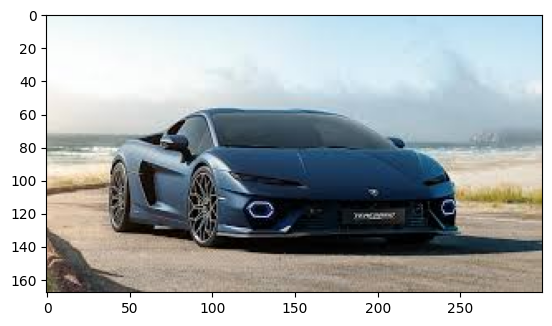

In [3]:
plt.imshow(show_car)

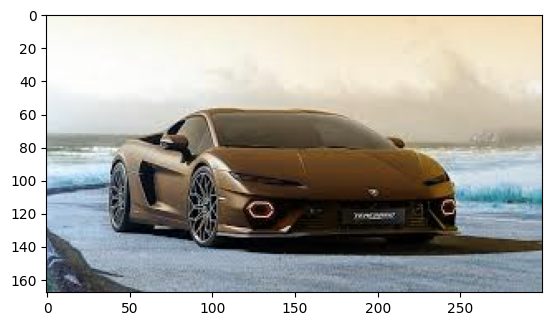

In [4]:
plt.imshow(dark_car)

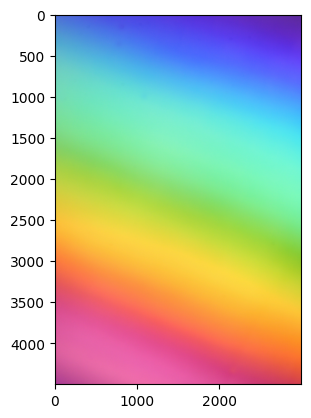

In [5]:
plt.imshow(rainbow)

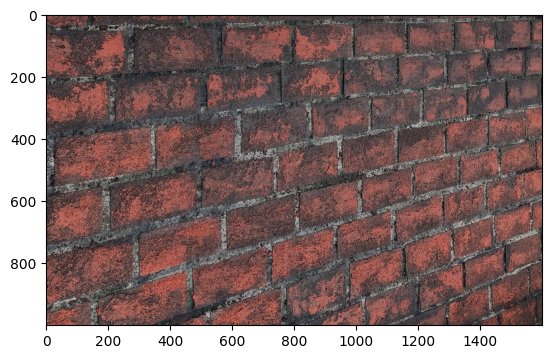

In [6]:
plt.imshow(show_bricks)

Open cv Histogram 
- cv2.calcHist(images,channels, mask , histSize, ranges[,hist[,accumulate]])
- images: it is source image of type uint8 or float32. 
- channels: it is also given in square brackets. It is the index of channel for which calculate histogram.
- mask : mask image. To find histogram of full image, you can pass[0],[1] or [2] to calculate histogram of blue, green or red channel respectively.
- histSize : this represent our BIN count. Need to be given in square brackets. we pass [256]
- ranges: this is our RANGE. Normally, it is [0,2,5,6]


In [7]:
# Opencv BGR 
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask= None, histSize=[256], ranges=[0,256])

In [8]:
hist_values.shape

(256, 1)

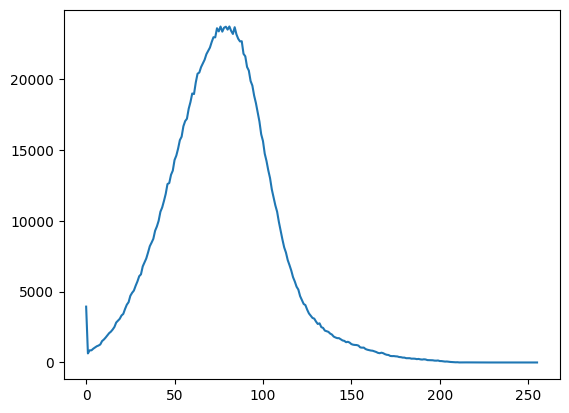

In [9]:
plt.plot(hist_values)

In [10]:
hist_values = cv2.calcHist([dark_car], channels=[0], mask=None, histSize= [256], ranges=[0, 256])

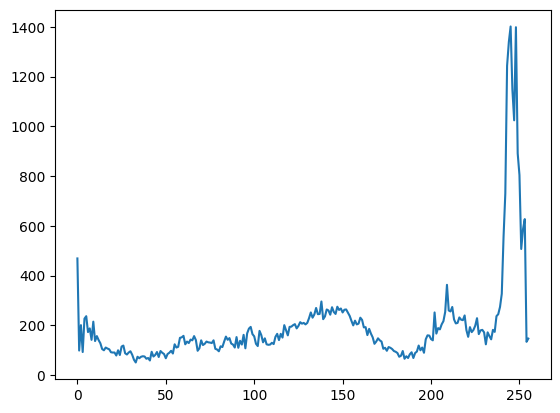

In [11]:
plt.plot(hist_values)

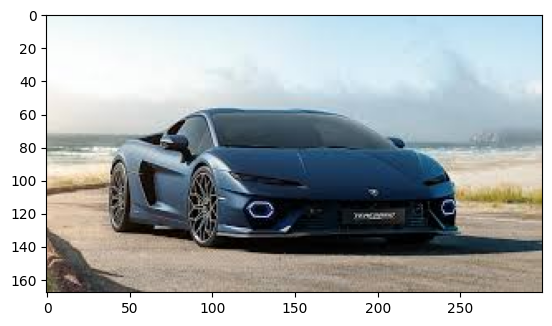

In [12]:
plt.imshow(show_car)

Plotting 3 histogram 

/tmp/ipykernel_103793/2614240114.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


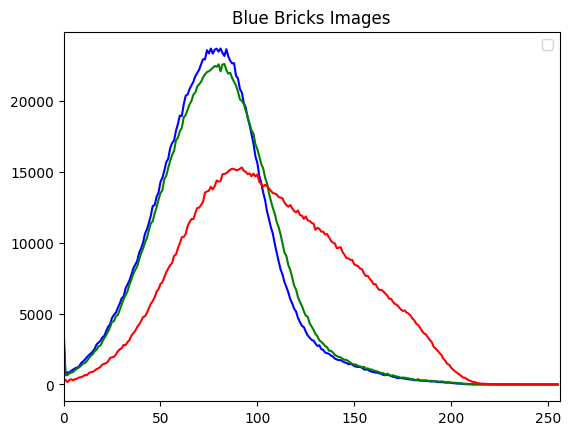

In [13]:
img = blue_bricks
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('Blue Bricks Images')
plt.legend()
plt.show()

/tmp/ipykernel_103793/1198041960.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


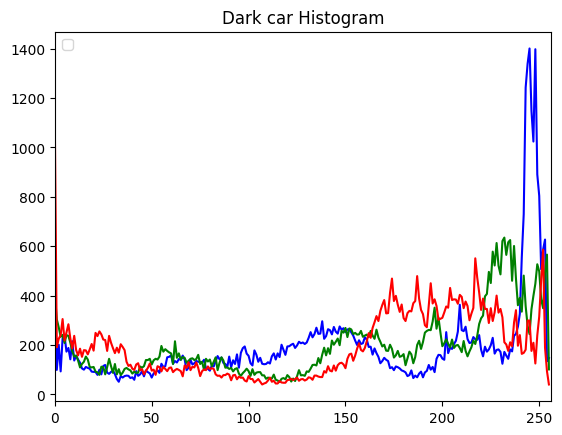

In [14]:
img = dark_car
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('Dark car Histogram')
plt.legend()
plt.show()

/tmp/ipykernel_103793/2099507107.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


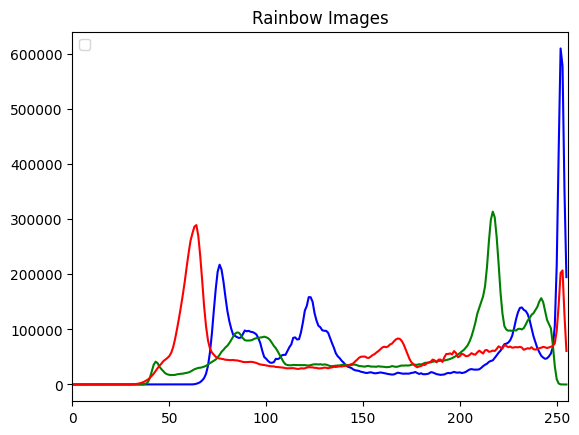

In [15]:
img = rainbow
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('Rainbow Images')
plt.legend()
plt.show()

Masking 

In [16]:
# We can mask certain parts of the images 
img = rainbow

In [17]:
img.shape

(4500, 3000, 3)

In [18]:
# create a mask 
mask = np.zeros(img.shape[:2], np.uint8)
mask[500:1000, 1000:2000] = 255

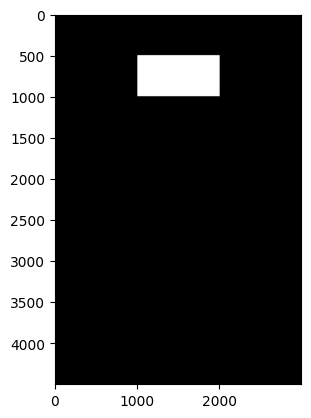

In [19]:
plt.imshow(mask, cmap='gray')

In [20]:
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

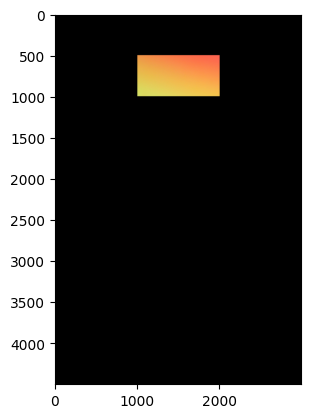

In [21]:
plt.imshow(show_masked_img)

In [22]:
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask= mask, histSize=[256], ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow], channels=[2], mask= None, histSize=[256], ranges=[0,256])


Text(0.5, 1.0, 'Histogram for RED values of the full image')

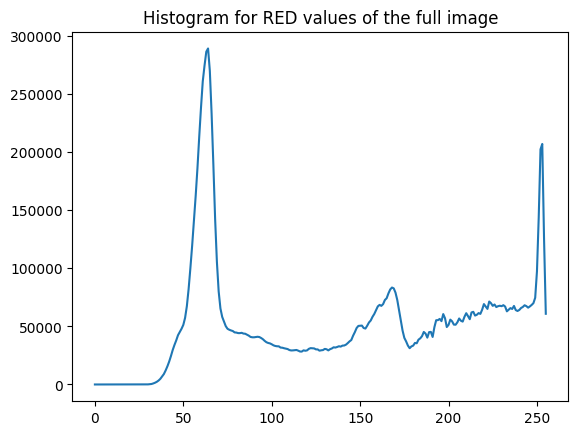

In [23]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

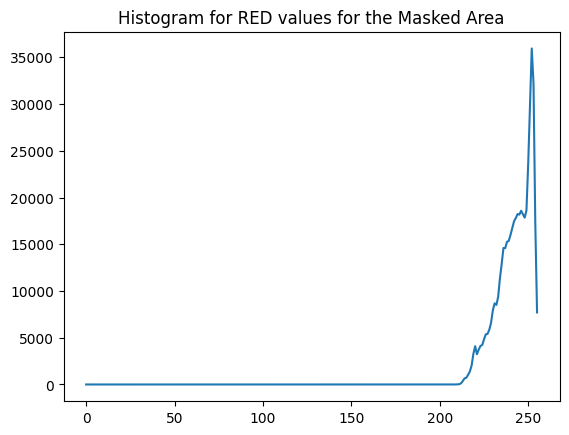

In [24]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')

Histogram Equalization 

In [25]:
gorilla = cv2.imread('gorilla_images.jpeg')

In [26]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)
    

Single Channel (GrayScale)

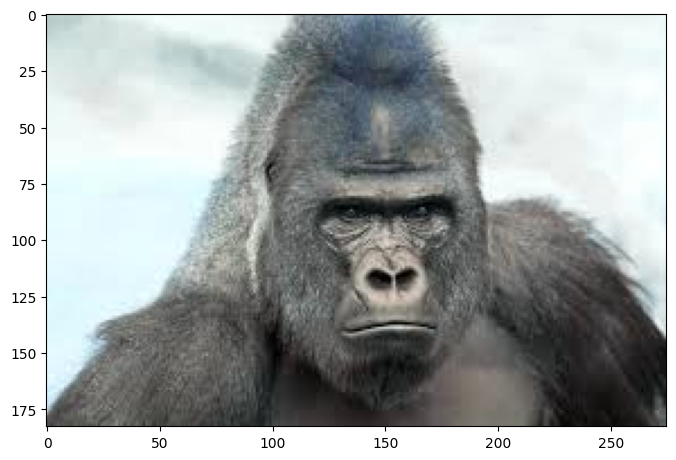

In [27]:
display(gorilla, cmap='gray')

In [28]:
hist_values = cv2.calcHist([gorilla],channels = [0], mask = None, histSize= [256], ranges=[0, 256])

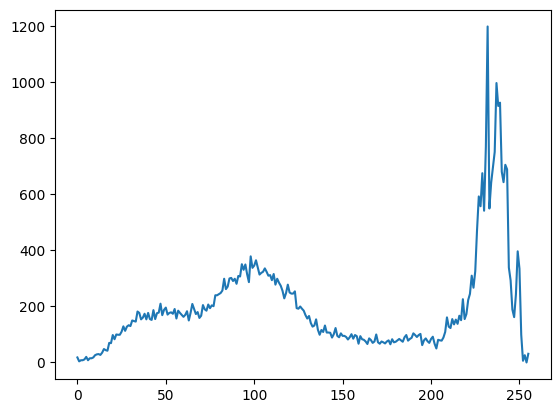

In [29]:
plt.plot(hist_values)

In [33]:
gorilla_gray = cv2.cvtColor(gorilla, cv2.COLOR_BGR2GRAY)
eq_gorilla = cv2.equalizeHist(gorilla_gray)

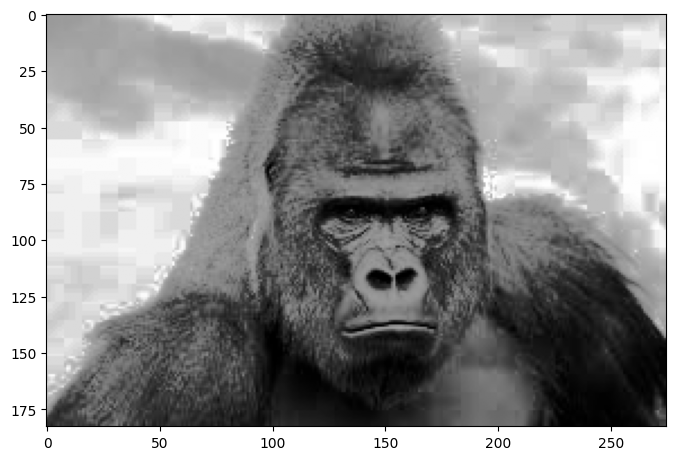

In [34]:
display(eq_gorilla, cmap='gray')

In [35]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask = None, histSize=[256], ranges = [0, 256])

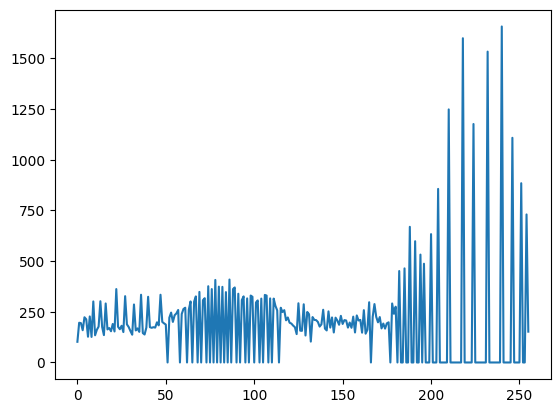

In [36]:
plt.plot(hist_values)

Color Images

In [39]:
color_gorilla = cv2.imread( 'gorilla_images.jpeg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

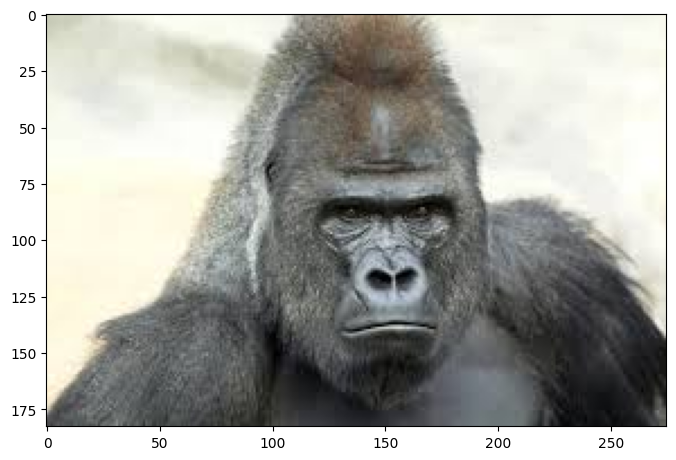

In [40]:
display(show_gorilla)

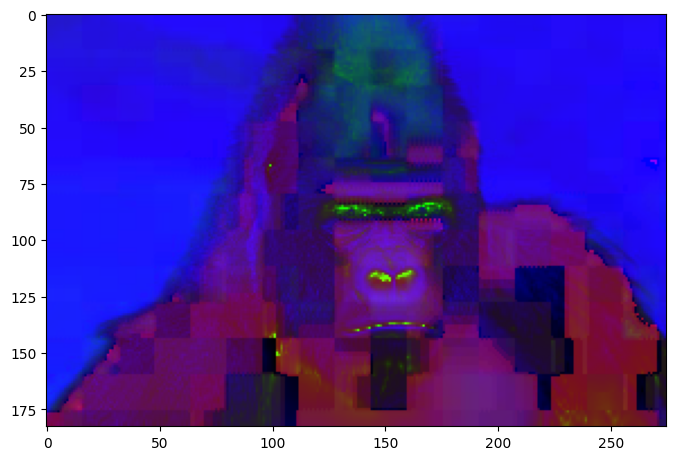

In [41]:
display(hsv)

In [42]:
# Grab V channels
hsv[:, :,2]

array([[206, 207, 207, ..., 248, 248, 248],
       [205, 205, 206, ..., 248, 248, 248],
       [202, 203, 204, ..., 248, 248, 248],
       ...,
       [ 81,  86,  83, ...,  86,  87,  89],
       [ 74,  81,  74, ...,  90,  91,  92],
       [ 75,  78,  64, ...,  92,  94,  97]], dtype=uint8)

In [43]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

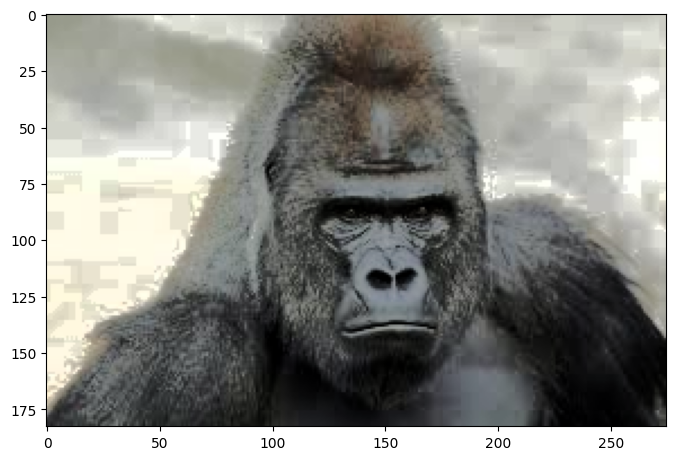

In [45]:
# Convert back to the RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)

In [1]:
# Done